### QUESTION 1

What are the main influences on Property Prices in Melbourne?

In this question, we are investigating the key attributes that contribute to deciding property prices. It considers dependent variables such as land size, building size, number and types of rooms, parking availability, property type, year built and time of sale. This will provide valuable insight to buyers, understanding what trade-offs may affect their budget as they look to enter the market, alongside providing sellers with some prediction modelling, basing their expected sale prices upon the attributes relevant to their property. 

In [145]:
#Importing the required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas
from sklearn.linear_model import LinearRegression
import geoviews as gv
import xarray as xr
import hvplot.xarray
import geoviews as gv
import holoviews as hv
import hvplot.xarray


## Different from #Q1 ###

In [146]:
# Import the csv file, read in the data into a pandas dataframe (Q2 Unique)
cleaned_df = pd.read_csv('Properties of Melbourne City (CLEANED).csv', low_memory=False) 


In [147]:
# View information abourt the data
cleaned_df.shape
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  int64  
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

### End of difference ##

In [148]:
#Display the table for preview
cleaned_df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [149]:
#Remove the old indexing column 'Unnamed: 0'
del cleaned_df["Unnamed: 0"]

#Check the changes have applied
cleaned_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
#Reduce the dataset down to just the relevant columns
melb_data2 = cleaned_df[["Price", "Type", "Suburb", "Distance", "Postcode", "Regionname", "Bathroom", "", "", ""]]



#Check the new dataframe
melb_data2.head()

In [151]:
#Reduce dataset
landsize_df = melb_data[["Price", "Landsize"]]
building_df = melb_data[["Price", "BuildingArea"]]
rooms_df = melb_data[["Price", "Rooms"]]
bedrooms_df = melb_data[["Price", "Bedroom2"]]
bathrooms_df = melb_data[["Price", "Bathroom"]]
cars_df = melb_data[["Price", "Car"]]
year_df = melb_data[["Price", "YearBuilt"]]


#Check for N/A Values
print(f'There are {landsize_df["Landsize"].isnull().sum()} NA Landsize values.')
print(f'There are {building_df["BuildingArea"].isnull().sum()} NA Building Area values.')
print(f'There are {rooms_df["Rooms"].isnull().sum()} NA Room values.')
print(f'There are {bedrooms_df["Bedroom2"].isnull().sum()} NA Bedroom values.')
print(f'There are {bathrooms_df["Bathroom"].isnull().sum()} NA Bathroom values.')
print(f'There are {cars_df["Car"].isnull().sum()} NA Car Spot values.')
print(f'There are {year_df["YearBuilt"].isnull().sum()} NA Year Built values.')

There are 4793 NA Landsize values.
There are 10634 NA Building Area values.
There are 0 NA Room values.
There are 3469 NA Bedroom values.
There are 3471 NA Bathroom values.
There are 3576 NA Car Spot values.
There are 9438 NA Year Built values.


In [152]:
#Remove the NA values
#Landsize
landsize_df = landsize_df.dropna(how='any')
landsize_df.reset_index(drop=True, inplace=True)

#Building Area
building_df = building_df.dropna(how='any')
building_df.reset_index(drop=True, inplace=True)

#Rooms
rooms_df = rooms_df.dropna(how='any')
rooms_df.reset_index(drop=True, inplace=True)

#Bedrooms
bedrooms_df = bedrooms_df.dropna(how='any')
bedrooms_df.reset_index(drop=True, inplace=True)

#Bathrooms
bathrooms_df = bathrooms_df.dropna(how='any')
bathrooms_df.reset_index(drop=True, inplace=True)

#Car Spots
cars_df = cars_df.dropna(how='any')
cars_df.reset_index(drop=True, inplace=True)

#Year Built
year_df = year_df.dropna(how='any')
year_df.reset_index(drop=True, inplace=True)

#Check the changes have applied
print(f'There are now {landsize_df["Landsize"].isnull().sum()} NA Landsize values.')
print(f'There are now {building_df["BuildingArea"].isnull().sum()} NA Building Area values.')
print(f'There are now {rooms_df["Rooms"].isnull().sum()} NA Room values.')
print(f'There are now {bedrooms_df["Bedroom2"].isnull().sum()} NA Bedroom values.')
print(f'There are now {bathrooms_df["Bathroom"].isnull().sum()} NA Bathroom values.')
print(f'There are now {cars_df["Car"].isnull().sum()} NA Car Spot values.')
print(f'There are now {year_df["YearBuilt"].isnull().sum()} NA Year Built values.')

There are now 0 NA Landsize values.
There are now 0 NA Building Area values.
There are now 0 NA Room values.
There are now 0 NA Bedroom values.
There are now 0 NA Bathroom values.
There are now 0 NA Car Spot values.
There are now 0 NA Year Built values.


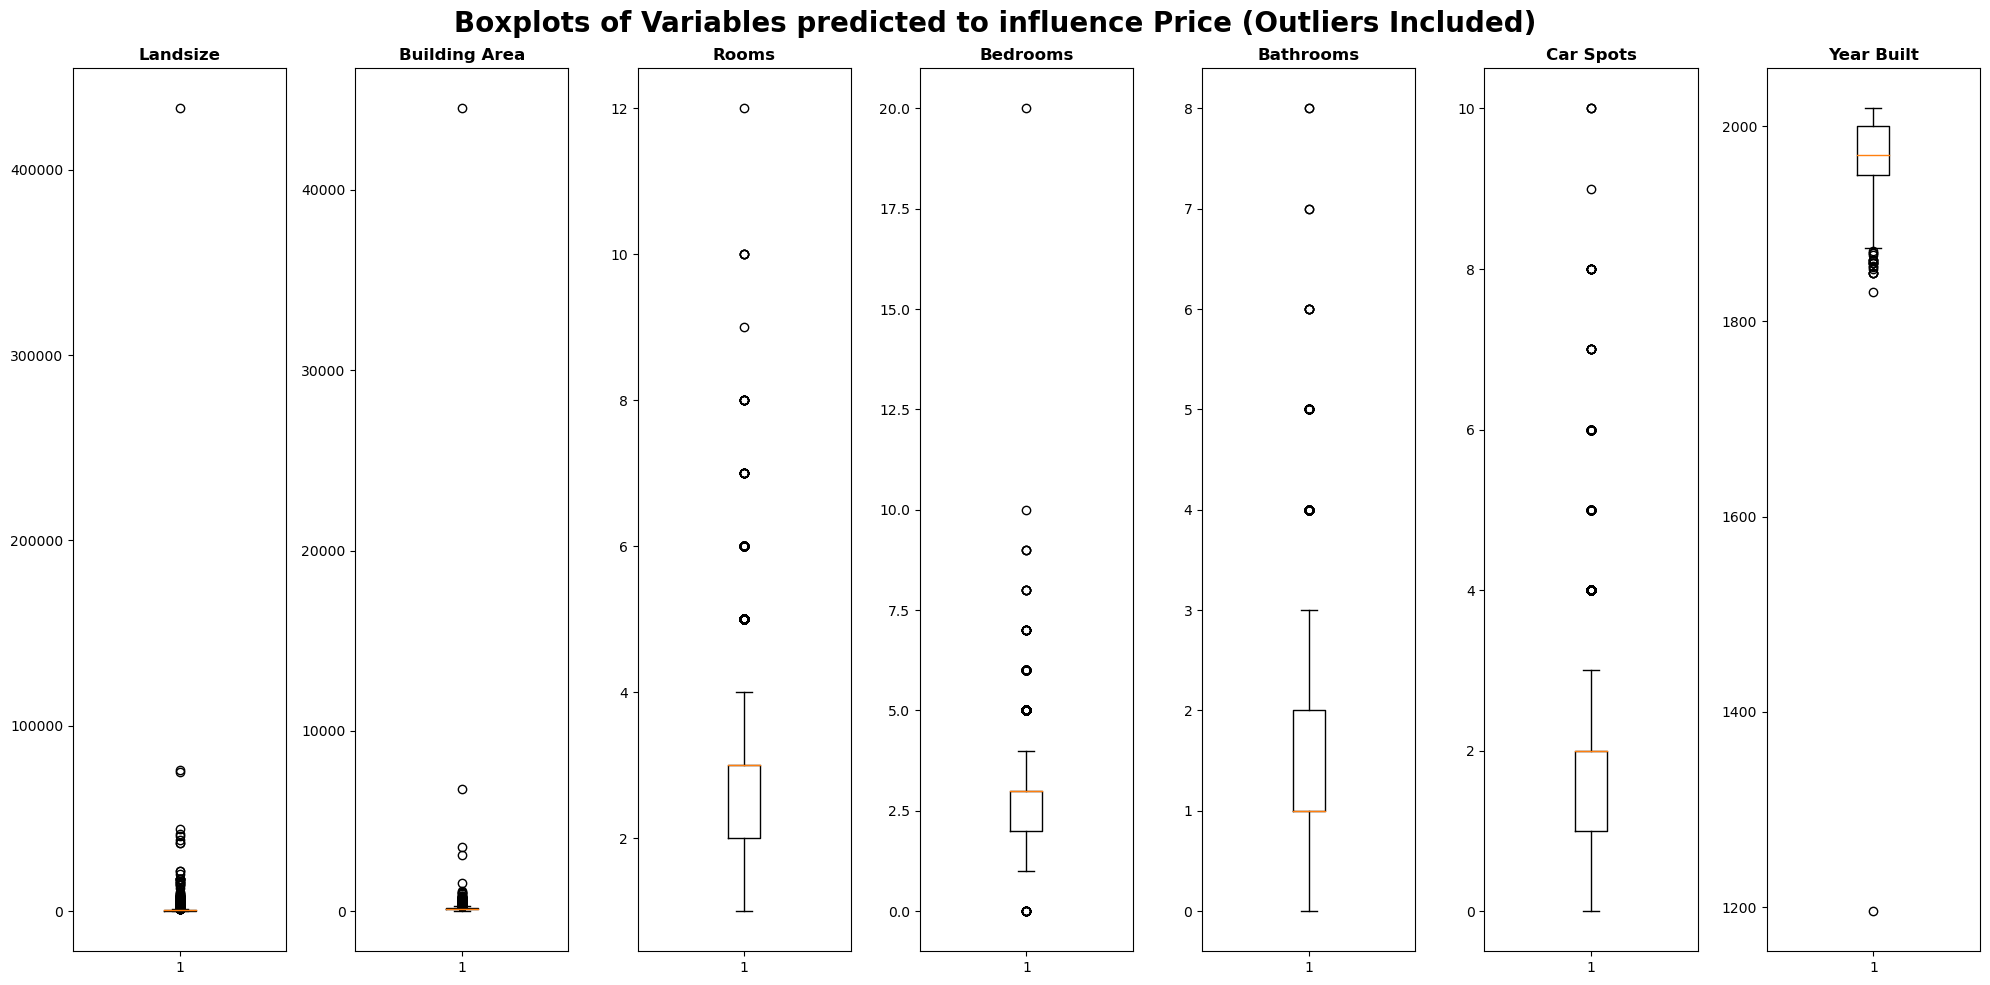

In [153]:
#Boxplot comparison prior to outlier removal
#Collect all the boxplot data
boxplot_data = [landsize_df["Landsize"], building_df["BuildingArea"], rooms_df["Rooms"], bedrooms_df["Bedroom2"], bathrooms_df["Bathroom"], cars_df["Car"], year_df["YearBuilt"]]
boxplot_titles = ["Landsize", "Building Area", "Rooms", "Bedrooms", "Bathrooms", "Car Spots", "Year Built"]

fig, axs = plt.subplots(1, len(boxplot_data), figsize=(20,10))
fig.suptitle("Boxplots of Variables predicted to influence Price (Outliers Included)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    ax.boxplot(boxplot_data[i])
    ax.set_title(boxplot_titles[i], fontweight="bold")

plt.tight_layout()

The data is significantly skewed by some extreme outliers in each variable. 

To improve the accuracy of our correlation & linear regression calculations, we will calculate reasonable upper and lower bounds for each variable and remove the predicted outliers that fall outside this range.

In [154]:
iqr_multiplier = 1.5

#Landsize
#Check for outliers
Q1 = landsize_df["Landsize"].quantile(0.25)
Q3 = landsize_df["Landsize"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
landsize_no_out = landsize_df.loc[(landsize_df["Landsize"] >= lower_bound) & (landsize_df["Landsize"] <= upper_bound), :]
landsize_data = landsize_no_out["Landsize"]
        
#printcheck
print(f"Landsize values below {lower_bound} could be an outlier")
print(f"Landsize values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Building Area
#Check for outliers
Q1 = building_df["BuildingArea"].quantile(0.25)
Q3 = building_df["BuildingArea"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
building_no_out = building_df.loc[(building_df["BuildingArea"] >= lower_bound) & (building_df["BuildingArea"] <= upper_bound), :]
building_data = building_no_out["BuildingArea"]
        
#printcheck
print(f"Building Area values below {lower_bound} could be an outlier")
print(f"Building Area values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Rooms
#Check for outliers
Q1 = rooms_df["Rooms"].quantile(0.25)
Q3 = rooms_df["Rooms"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
rooms_no_out = rooms_df.loc[(rooms_df["Rooms"] >= lower_bound) & (rooms_df["Rooms"] <= upper_bound), :]
rooms_data = rooms_no_out["Rooms"]
        
#printcheck
print(f"Room values below {lower_bound} could be an outlier")
print(f"Room values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Bedrooms
#Check for outliers
Q1 = bedrooms_df["Bedroom2"].quantile(0.25)
Q3 = bedrooms_df["Bedroom2"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
bedrooms_no_out = bedrooms_df.loc[(bedrooms_df["Bedroom2"] >= lower_bound) & (bedrooms_df["Bedroom2"] <= upper_bound), :]
bedrooms_data = bedrooms_no_out["Bedroom2"]
        
#printcheck
print(f"Bedroom values below {lower_bound} could be an outlier")
print(f"Bedroom values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Bathrooms
#Check for outliers
Q1 = bathrooms_df["Bathroom"].quantile(0.25)
Q3 = bathrooms_df["Bathroom"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
bathrooms_no_out = bathrooms_df.loc[(bathrooms_df["Bathroom"] >= lower_bound) & (bathrooms_df["Bathroom"] <= upper_bound), :]
bathrooms_data = bathrooms_no_out["Bathroom"]
        
#printcheck
print(f"Bathroom values below {lower_bound} could be an outlier")
print(f"Bathroom values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Car Spots
#Check for outliers
Q1 = cars_df["Car"].quantile(0.25)
Q3 = cars_df["Car"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
cars_no_out = cars_df.loc[(cars_df["Car"] >= lower_bound) & (cars_df["Car"] <= upper_bound), :]
cars_data = cars_no_out["Car"]
        
#printcheck
print(f"Car Spot values below {lower_bound} could be an outlier")
print(f"Car Spot values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Year Built
#Check for outliers
Q1 = year_df["YearBuilt"].quantile(0.25)
Q3 = year_df["YearBuilt"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
year_no_out = year_df.loc[(year_df["YearBuilt"] >= lower_bound) & (year_df["YearBuilt"] <= upper_bound), :]
year_data = year_no_out["YearBuilt"]
        
#printcheck
print(f"Year Built values below {lower_bound} could be an outlier")
print(f"Year Built values above {upper_bound} could be an outlier")
print ("----------------------------------")

Landsize values below -535.25 could be an outlier
Landsize values above 1362.75 could be an outlier
----------------------------------
Building Area values below -28.5 could be an outlier
Building Area values above 295.5 could be an outlier
----------------------------------
Room values below 0.5 could be an outlier
Room values above 4.5 could be an outlier
----------------------------------
Bedroom values below 0.5 could be an outlier
Bedroom values above 4.5 could be an outlier
----------------------------------
Bathroom values below -0.5 could be an outlier
Bathroom values above 3.5 could be an outlier
----------------------------------
Car Spot values below -0.5 could be an outlier
Car Spot values above 3.5 could be an outlier
----------------------------------
Year Built values below 1875.0 could be an outlier
Year Built values above 2075.0 could be an outlier
----------------------------------


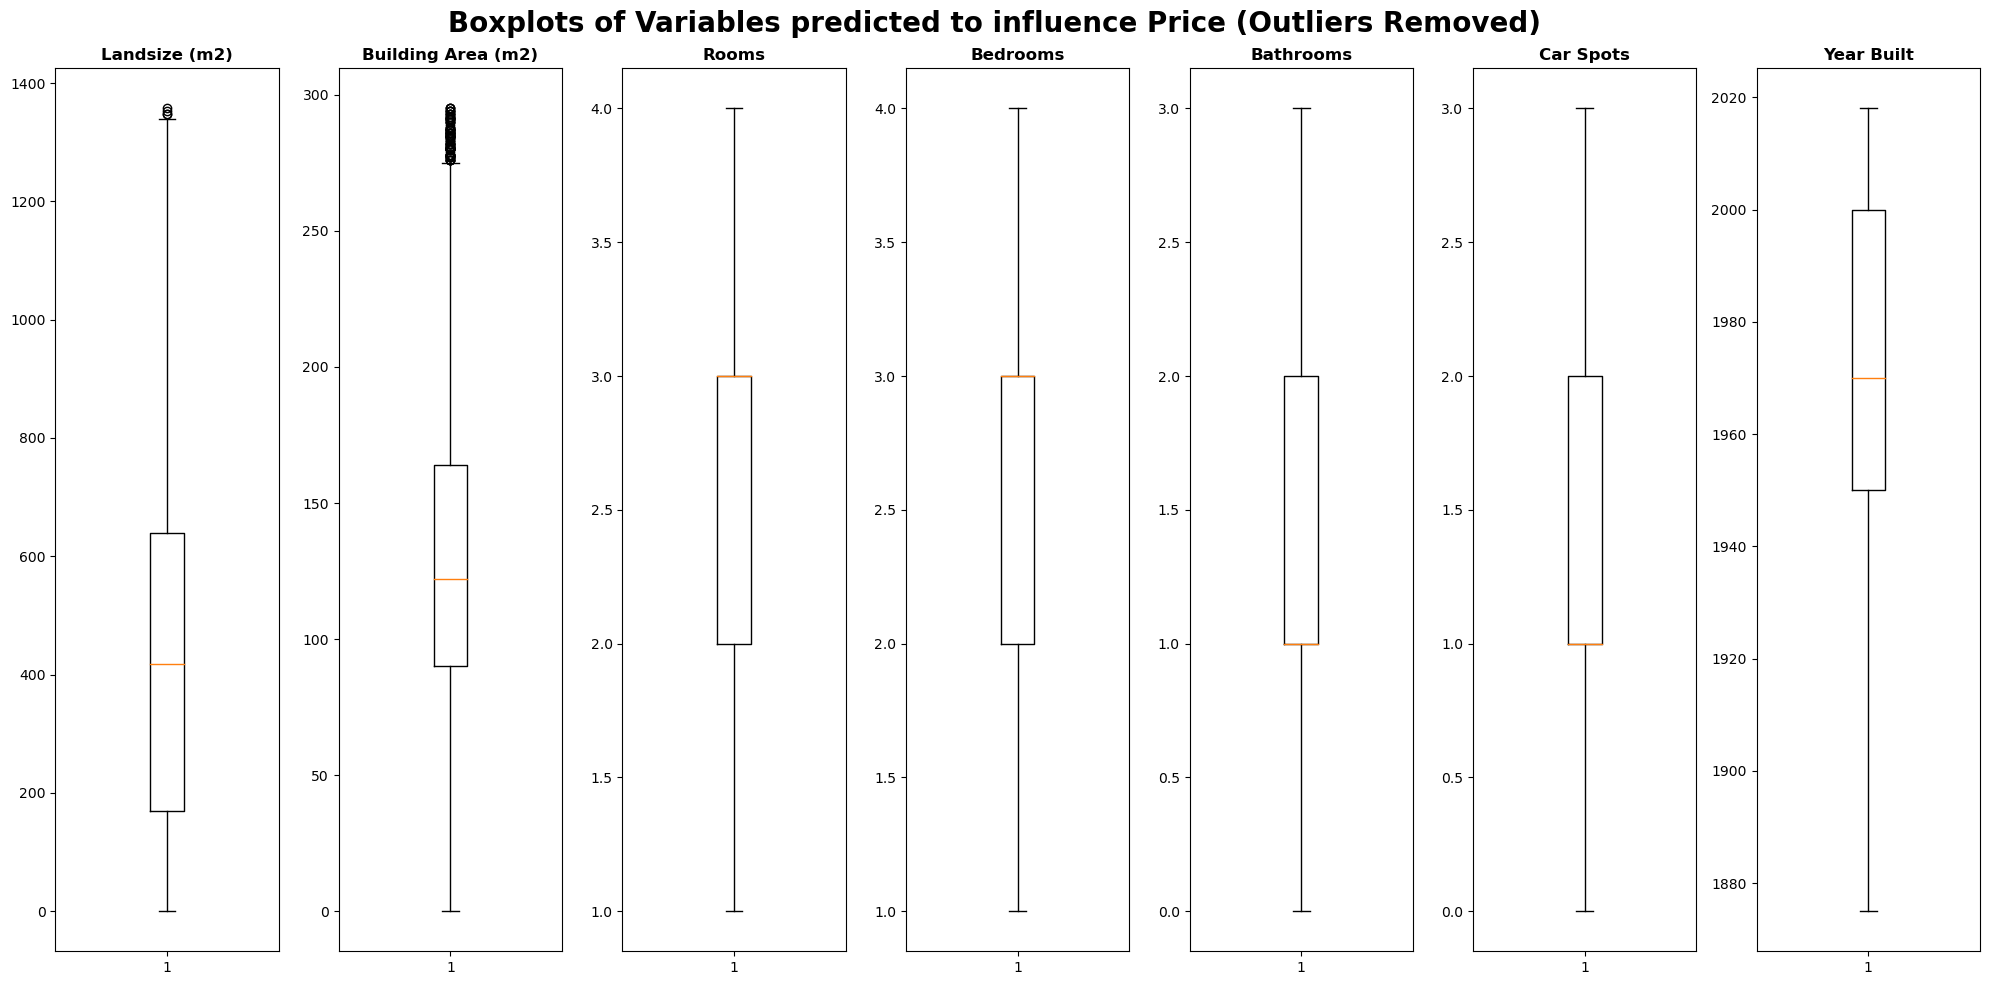

In [155]:
#Collect all the boxplot data
boxplot_data = [landsize_data, building_data, rooms_data, bedrooms_data, bathrooms_data, cars_data, year_data]
boxplot_titles = ["Landsize (m2)", "Building Area (m2)", "Rooms", "Bedrooms", "Bathrooms", "Car Spots", "Year Built"]

fig, axs = plt.subplots(1, len(boxplot_data), figsize=(20,10))
fig.suptitle("Boxplots of Variables predicted to influence Price (Outliers Removed)", fontsize = 20, fontweight = 'bold')

for i, ax in enumerate(axs.flat):
    ax.boxplot(boxplot_data[i])
    ax.set_title(boxplot_titles[i], fontweight="bold")

plt.tight_layout()

### Correlation Matrix

In [156]:
#Calculate correlation for price against each variable using the cleaned datasets
correlation_data = [landsize_no_out, building_no_out, rooms_no_out, bedrooms_no_out, bathrooms_no_out, cars_no_out, year_no_out]

for j in correlation_data:
    col_name = j.iloc[:,1].name
    corr_test = st.pearsonr(j.iloc[:,0], j.iloc[:,1])
    corr = corr_test[0]
    print(f'The correlation value for {col_name} against Price is {round(corr,3)}')


The correlation value for Landsize against Price is 0.339
The correlation value for BuildingArea against Price is 0.551
The correlation value for Rooms against Price is 0.462
The correlation value for Bedroom2 against Price is 0.451
The correlation value for Bathroom against Price is 0.419
The correlation value for Car against Price is 0.236
The correlation value for YearBuilt against Price is -0.327


### Linear Regression Plots

IndexError: list index out of range

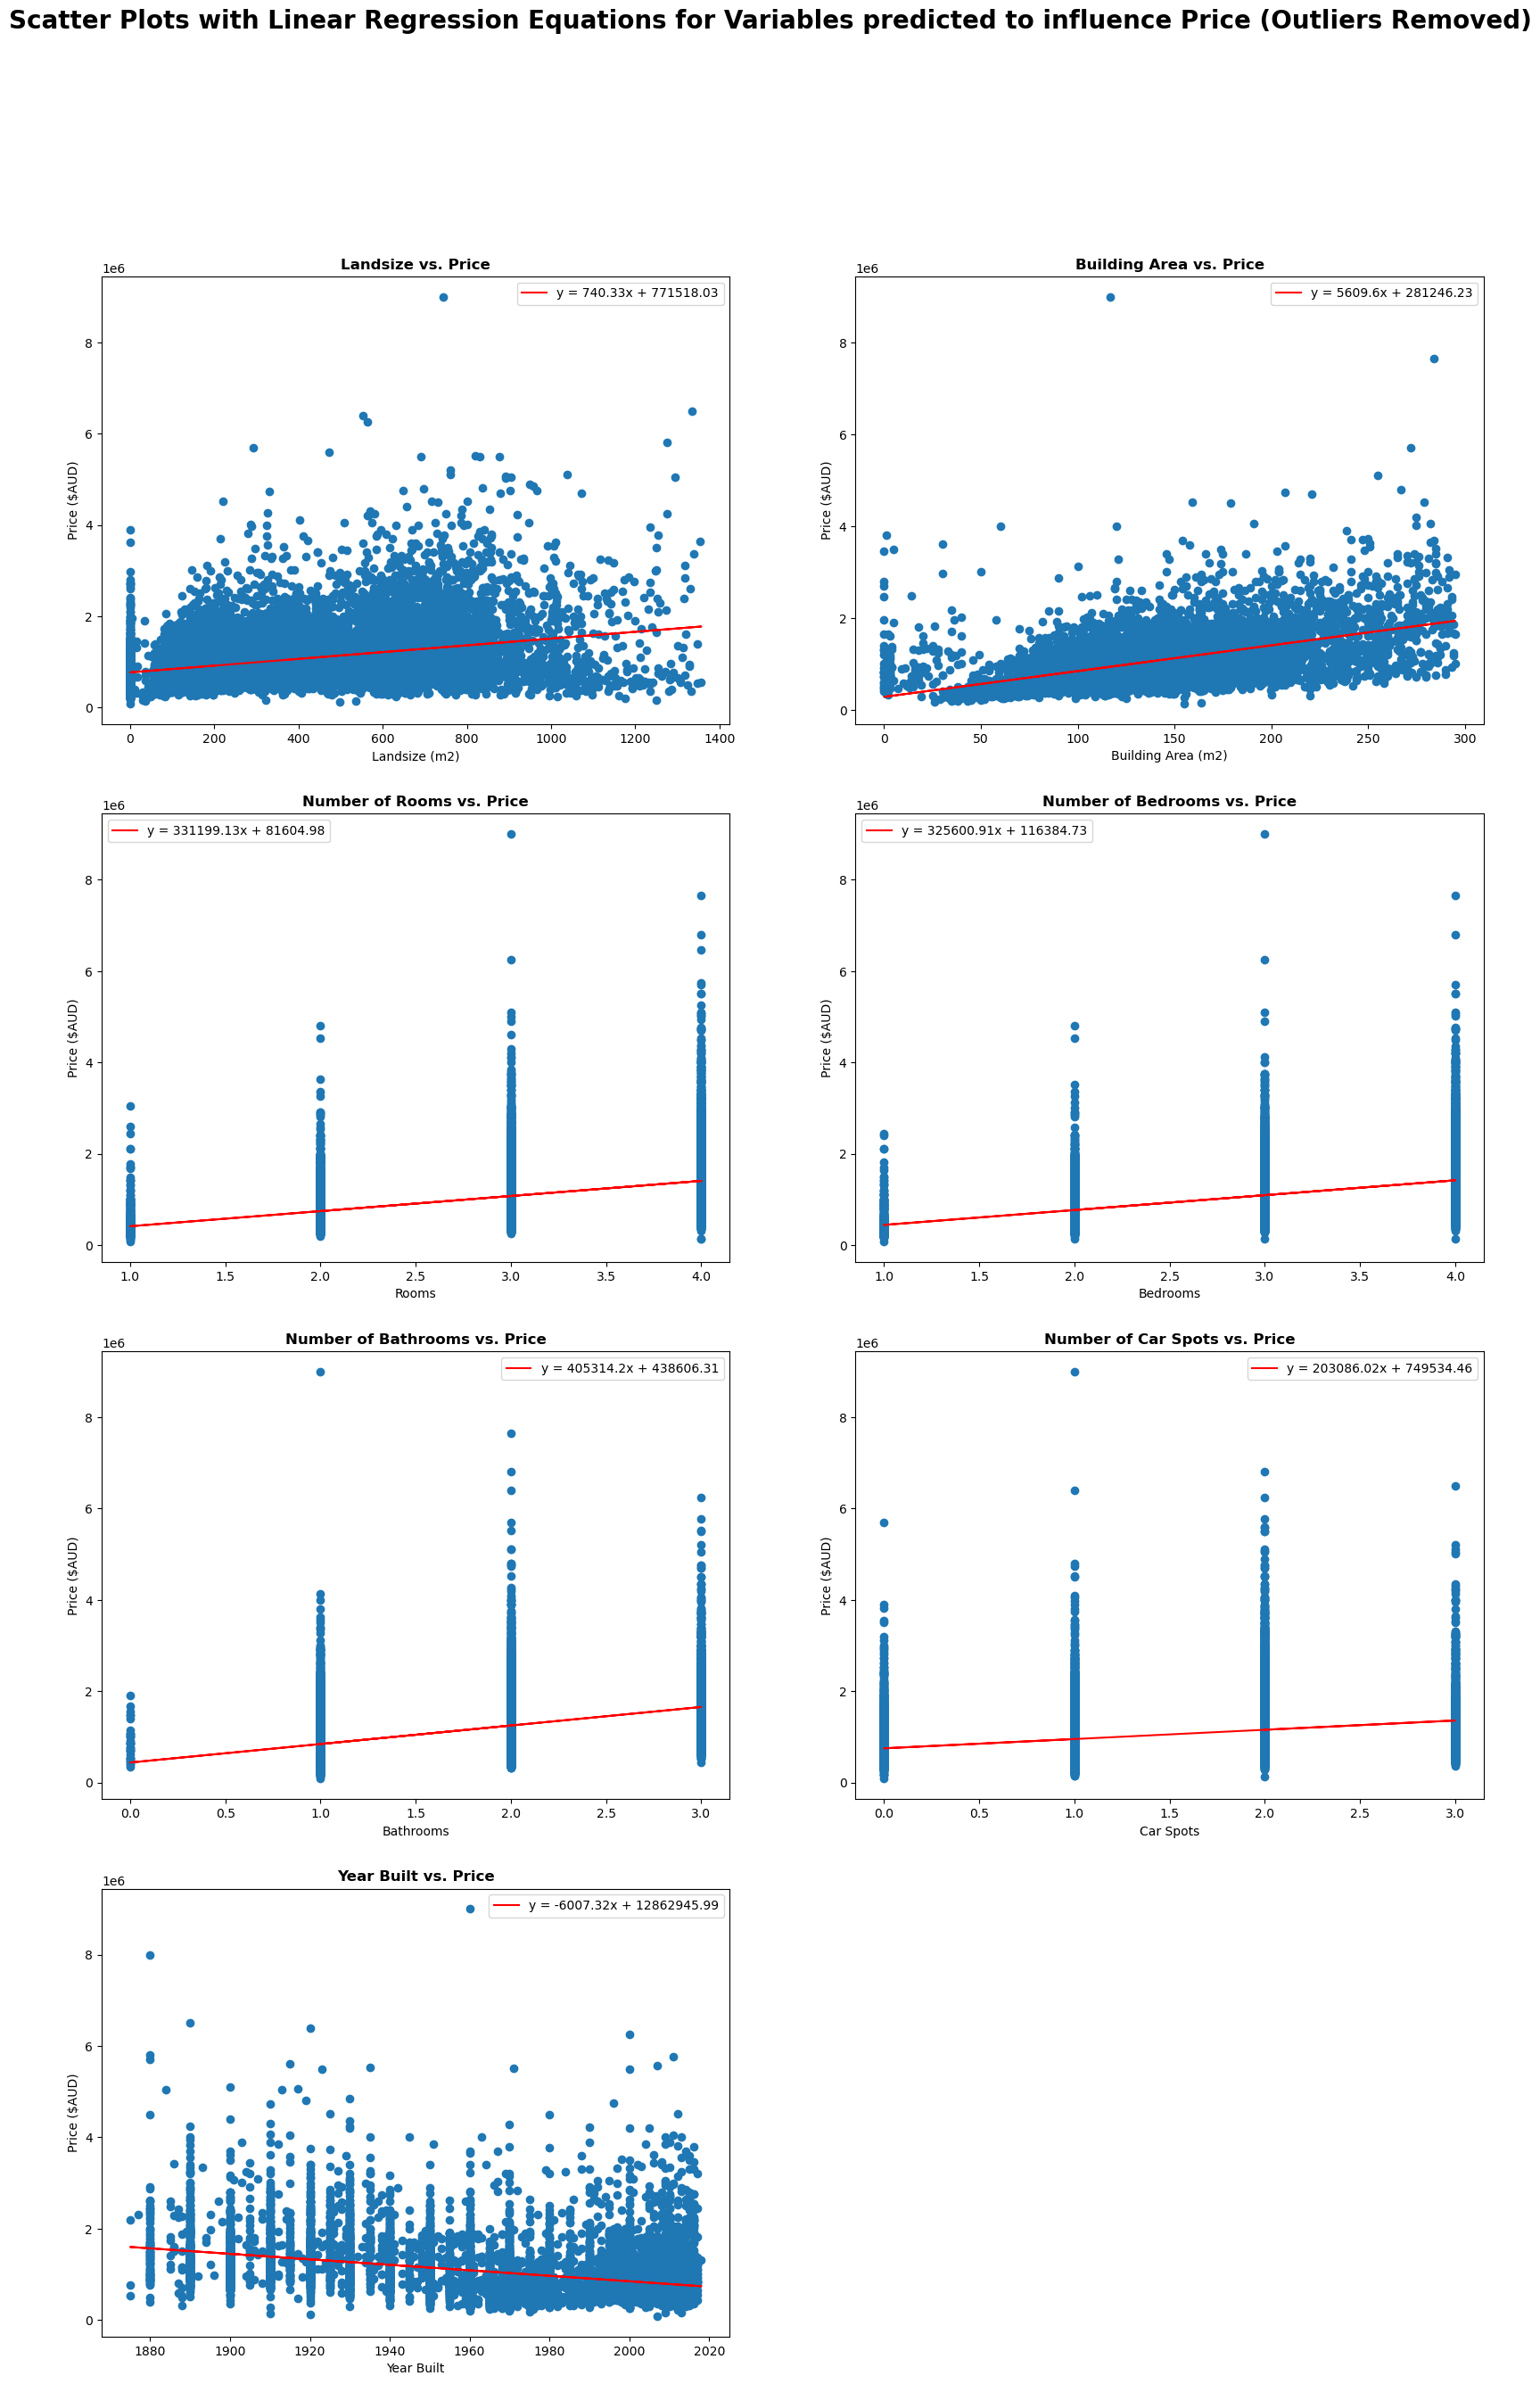

In [157]:
#Use the correlation data list for calculating each linear regression using for loops
#Create a list of subplot titles
scatter_titles = ["Landsize vs. Price", "Building Area vs. Price", "Number of Rooms vs. Price", "Number of Bedrooms vs. Price", "Number of Bathrooms vs. Price", "Number of Car Spots vs. Price", "Year Built vs. Price"]
scatter_xlabels = boxplot_titles

fig, axs = plt.subplots(4, 2, figsize=(20,30))
fig.suptitle("Scatter Plots with Linear Regression Equations for Variables predicted to influence Price (Outliers Removed)", fontsize = 20, fontweight = 'bold')
fig.delaxes(axs[3,1])

for i, ax in enumerate(axs.flat):
    #Calculate the linear regression
    x_values = correlation_data[i].iloc[:,1]
    y_values = correlation_data[i].iloc[:,0]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Save the line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Plot the data
    ax.scatter(x_values, y_values)
    ax.set_title(scatter_titles[i], fontweight="bold")
    ax.set_xlabel(scatter_xlabels[i])
    ax.set_ylabel("Price ($AUD)")

    #Add the regrssion line & equation
    ax.plot(x_values, regress_values, "r-")
    red_line = plt.Line2D([], [], color='red', label=line_eq)
    ax.legend(handles=[red_line])

plt.tight_layout()

We can clearly see from these plots, that the variables 'Rooms', 'Bedrooms', 'Bathrooms' and 'Car Spots' are discrete variables. However, as they are still numeric, ordinal values, Pearson's correlation test is still valid. Ordinal variables do not meet the assumptions of linear regression however, so we cannot use our linear regression equation as a prediction tool. Year Built is also an ordinal variable, but with a much larger range. Further testing would be required to validate the linear regression equation for Year Built, but it will likely not satisfy the assumptions of linear regression because of this. 

### Type

### Remove NA Values and Group the data by Property Type

In [158]:
#Collate the data into 'Type' groups
house_df = melb_data.loc[melb_data["Type"] == 'h', :]
townhouse_df = melb_data.loc[melb_data["Type"] == 't', :]
unit_df = melb_data.loc[melb_data["Type"] == 'u', :]

#Isolate the Price data
house_price_data = house_df[["Price"]]
townhouse_price_data = townhouse_df[["Price"]]
unit_price_data = unit_df[["Price"]]

### Outliers

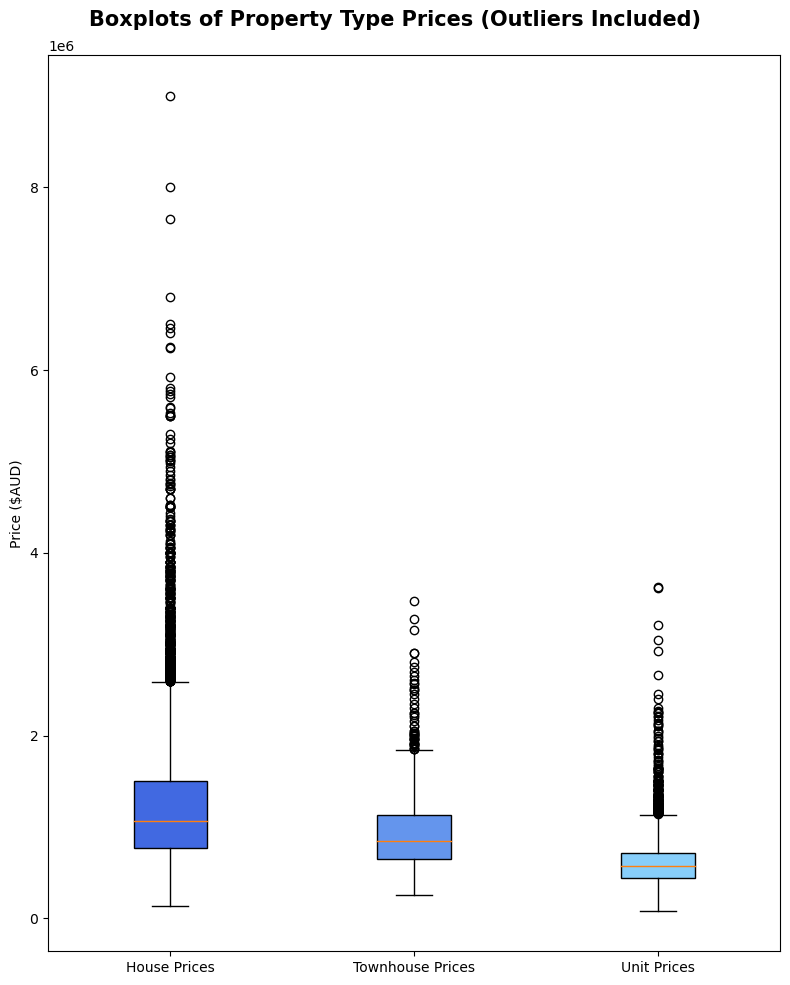

In [159]:
#Boxplot comparison prior to outlier removal
#Collect all the boxplot data
boxplot_type_dict = {"House Prices": house_price_data["Price"], 
                    "Townhouse Prices": townhouse_price_data["Price"], 
                    "Unit Prices": unit_price_data["Price"]}

fig, ax = plt.subplots(figsize=(8,10))
fig.suptitle("Boxplots of Property Type Prices (Outliers Included)", fontsize = 15, fontweight = 'bold')
bp = ax.boxplot(boxplot_type_dict.values(), labels=boxplot_type_dict.keys(), patch_artist=True)
bp['boxes'][0].set_facecolor('royalblue')
bp['boxes'][1].set_facecolor('cornflowerblue')
bp['boxes'][2].set_facecolor('lightskyblue')
ax.set_ylabel("Price ($AUD)")

plt.tight_layout()


In [160]:
#House
#Check for outliers
Q1 = house_df["Price"].quantile(0.25)
Q3 = house_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
house_no_out = house_df.loc[(house_df["Price"] >= lower_bound) & (house_df["Price"] <= upper_bound), :]
house_price_data = house_no_out["Price"]
        
#printcheck
print(f"House Price values below {lower_bound} could be an outlier")
print(f"House Price values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Townhouse
#Check for outliers
Q1 = townhouse_df["Price"].quantile(0.25)
Q3 = townhouse_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
townhouse_no_out = townhouse_df.loc[(townhouse_df["Price"] >= lower_bound) & (townhouse_df["Price"] <= upper_bound), :]
townhouse_price_data = townhouse_no_out["Price"]
        
#printcheck
print(f"Townhouse Price values below {lower_bound} could be an outlier")
print(f"Townhouse Price values above {upper_bound} could be an outlier")
print ("----------------------------------")

#Unit
#Check for outliers
Q1 = unit_df["Price"].quantile(0.25)
Q3 = unit_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
unit_no_out = unit_df.loc[(unit_df["Price"] >= lower_bound) & (unit_df["Price"] <= upper_bound), :]
unit_price_data = unit_no_out["Price"]
        
#printcheck
print(f"Unit Price values below {lower_bound} could be an outlier")
print(f"Unit Price values above {upper_bound} could be an outlier")
print ("----------------------------------")

House Price values below -320000.0 could be an outlier
House Price values above 2592000.0 could be an outlier
----------------------------------
Townhouse Price values below -63750.0 could be an outlier
Townhouse Price values above 1846250.0 could be an outlier
----------------------------------
Unit Price values below 25000.0 could be an outlier
Unit Price values above 1137000.0 could be an outlier
----------------------------------


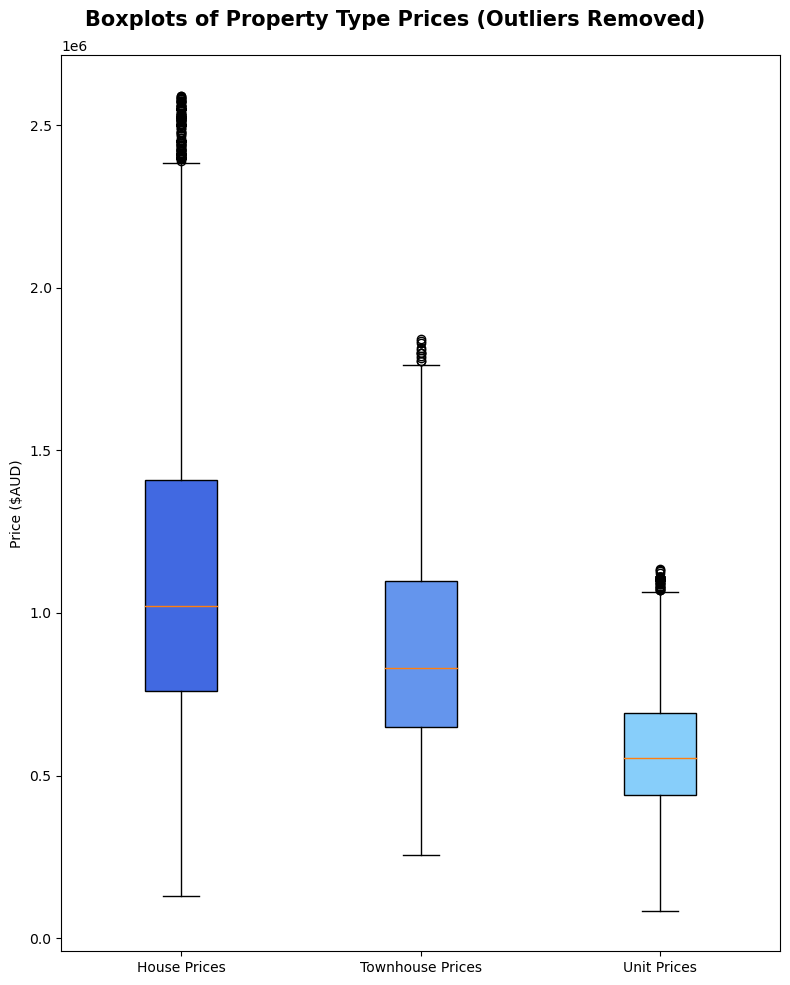

In [161]:
#Boxplot comparison after outlier removal
#Collect all the boxplot data
boxplot_type_dict = {"House Prices": house_price_data, 
                    "Townhouse Prices": townhouse_price_data, 
                    "Unit Prices": unit_price_data}

fig, ax = plt.subplots(figsize=(8,10))
fig.suptitle("Boxplots of Property Type Prices (Outliers Removed)", fontsize = 15, fontweight = 'bold')
bp = ax.boxplot(boxplot_type_dict.values(), labels=boxplot_type_dict.keys(), patch_artist=True)
bp['boxes'][0].set_facecolor('royalblue')
bp['boxes'][1].set_facecolor('cornflowerblue')
bp['boxes'][2].set_facecolor('lightskyblue')
ax.set_ylabel("Price ($AUD)")

plt.tight_layout()


Although it appears by comparison of the medians and IQR that House Prices are higher than Townhouse Prices which are then higher than Unit Prices, this conclusion can be due to chance. Therefore, we should use a test to compare the means of each data set, to confirm that these differences are statistically significant differences.

### T-Test
As our three datasets are independent and do not share an equal variance, we must use Welch's T-Test. 

For each test, the statistical hypotheses are:
 - Null Hypothesis (H0): The true difference in means is equal to 0, or differences are caused by chance.
 - Alternative Hypothesis (H1): The true difference in means is not equal to 0, which isn't caused solely by chance.
The significance level used will be 0.05.
 - H0 is true if p > 0.05
 - H1 is true if p < 0.05

The assumptions of the test:
 - Independence of observations - each data point and dataset is independent of one another.
 - No significant outliers present - outliers were removed previously.
 - Normality - the data for each group is approximately normally distributed.

In [162]:
#Calculate the T-test for each comparison and display the results.
#House vs. Townhouse
t_test = st.ttest_ind(house_price_data, townhouse_price_data, equal_var=False)
house_vs_town_p = t_test[1]

if house_vs_town_p > 0.05:
    print(f'The p-value of the Welch T-Test between House Prices and Townhouse Prices is {house_vs_town_p}')
    print(f'Therefore, the null hypothesis cannot be rejected; House Prices are not significantly higher than Townhouse Prices.')
else:
    print(f'The p-value of the Welch T-Test between House Prices and Townhouse Prices is {house_vs_town_p}')
    print(f'Therefore, the null hypothesis can be rejected; House Prices are significantly higher than Townhouse Prices.')
print("-------------------------------------------")

#House vs. Unit
t_test = st.ttest_ind(house_price_data, unit_price_data, equal_var=False)
house_vs_unit_p = t_test[1]

if house_vs_unit_p > 0.05:
    print(f'The p-value of the Welch T-Test between House Prices and Unit Prices is {house_vs_unit_p}')
    print(f'Therefore, the null hypothesis cannot be rejected; House Prices are not significantly higher than Unit Prices.')
else:
    print(f'The p-value of the Welch T-Test between House Prices and Unit Prices is {house_vs_unit_p}')
    print(f'Therefore, the null hypothesis can be rejected; House Prices are significantly higher than Unit Prices.')
print("-------------------------------------------")

#Townhouse vs. Unit
t_test = st.ttest_ind(townhouse_price_data,unit_price_data, equal_var=False)
town_vs_unit_p = t_test[1]

if town_vs_unit_p > 0.05:
    print(f'The p-value of the Welch T-Test between Townhouse Prices and Unit Prices is {town_vs_unit_p}')
    print(f'Therefore, the null hypothesis cannot be rejected; Townhouse Prices are not significantly higher than Unit Prices.')
else:
    print(f'The p-value of the Welch T-Test between Townhouse Prices and Unit Prices is {town_vs_unit_p}')
    print(f'Therefore, the null hypothesis can be rejected; Townhouse Prices are significantly higher than Unit Prices.')
print("-------------------------------------------")


The p-value of the Welch T-Test between House Prices and Townhouse Prices is 5.002233744958822e-162
Therefore, the null hypothesis can be rejected; House Prices are significantly higher than Townhouse Prices.
-------------------------------------------
The p-value of the Welch T-Test between House Prices and Unit Prices is 0.0
Therefore, the null hypothesis can be rejected; House Prices are significantly higher than Unit Prices.
-------------------------------------------
The p-value of the Welch T-Test between Townhouse Prices and Unit Prices is 1.0175867593618204e-277
Therefore, the null hypothesis can be rejected; Townhouse Prices are significantly higher than Unit Prices.
-------------------------------------------


### Date

In [163]:
#Collate the Date and Price data
date_df = melb_data[["Price", "Type", "Date"]]

### Outliers

In [164]:
#Price
#Check for outliers
Q1 = date_df["Price"].quantile(0.25)
Q3 = date_df["Price"].quantile(0.75)
iqr = Q3 - Q1
upper_bound = Q3 + iqr_multiplier * iqr
lower_bound = Q1 - iqr_multiplier * iqr

#Remove Outliers
date_no_out = date_df.loc[(date_df["Price"] >= lower_bound) & (date_df["Price"] <= upper_bound), :]
        
#printcheck
print(f"House Price values below {lower_bound} could be an outlier")
print(f"House Price values above {upper_bound} could be an outlier")

House Price values below -370500.0 could be an outlier
House Price values above 2305500.0 could be an outlier


### Bin Values per Month

In [165]:
#Create the month list for appending
month = []

#Extract the month value for each entry
for x in range(0, len(date_no_out)):
    split_up = date_no_out.iloc[x, 2].split('-')
    #date_no_out.iloc[x, 2] = split_up[1]
    month.append(split_up[1])

date_no_out["Month"] = month
date_no_out.head()

C:\Users\kk\AppData\Local\Temp\ipykernel_16968\3337193819.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_no_out["Month"] = month


,Price,Type,Date,Month
0,1480000,h,2016-03-12,03
1,1035000,h,2016-04-02,04
2,1465000,h,2017-04-03,04
3,850000,h,2017-04-03,04
4,1600000,h,2016-04-06,04


In [166]:
#Group the data by month
#All data
month_prices = date_no_out[["Month", "Price"]].groupby("Month").mean()
month_prices = month_prices["Price"].tolist()


#House data
month_house_prices = date_no_out.loc[date_no_out["Type"] == "h", :]
month_house_prices = month_house_prices[["Month", "Price"]].groupby("Month").mean()
month_house_prices = month_house_prices["Price"].tolist()


#Townhouse data
month_town_prices = date_no_out.loc[date_no_out["Type"] == "t", :]
month_town_prices = month_town_prices[["Month", "Price"]].groupby("Month").mean()
month_town_prices = month_town_prices["Price"].tolist()


#Unit
month_unit_prices = date_no_out.loc[date_no_out["Type"] == "u", :]
month_unit_prices = month_unit_prices[["Month", "Price"]].groupby("Month").mean()
month_unit_prices = month_unit_prices["Price"].tolist()

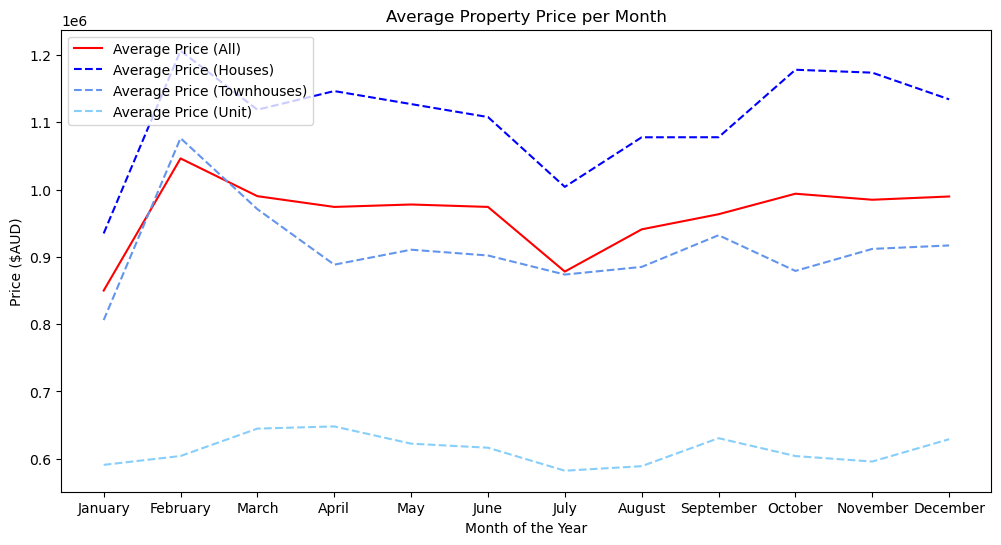

In [167]:
#Compare on a line chart
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12,6))

all_line = plt.plot(months, month_prices, color="red", label="Average Price (All)")
house_line = plt.plot(months, month_house_prices, color="blue", label="Average Price (Houses)", linestyle="dashed")
town_line = plt.plot(months, month_town_prices, color="cornflowerblue", label="Average Price (Townhouses)", linestyle="dashed")
unit_line = plt.plot(months, month_unit_prices, color="lightskyblue", label="Average Price (Unit)", linestyle="dashed")

plt.title("Average Property Price per Month")
plt.ylabel("Price ($AUD)")
plt.xlabel("Month of the Year")
plt.legend(loc="best")

plt.show()

### Question 2 ###

In [168]:
cleaned_df.to_csv('cleaned_df.csv', index=False)

In [169]:
cleaned_df.columns 

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [170]:
cleaned_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,Williamstown,8/2 Thompson St,2,t,622500,SP,Greg,2017-08-26,6.8,3016.0,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,2017-08-26,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,Yallambie,17 Amaroo Wy,4,h,1100000,S,Buckingham,2017-08-26,12.7,3085.0,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,Yarraville,6 Agnes St,4,h,1285000,SP,Village,2017-08-26,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [171]:
#Create a data source for the distance vs. price analysis plotted by location
Q2_distance_df = cleaned_df[['Lattitude', 'Longtitude',  'Distance', 'Type', 'Price', 'Regionname']]
Q2_distance_df = Q2_distance_df.dropna(how='any')
Q2_distance_df.reset_index(drop=True, inplace=True)
print(Q2_distance_df)


       Lattitude  Longtitude  Distance Type    Price             Regionname
0      -37.79960   144.99840       2.5    h  1480000  Northern Metropolitan
1      -37.80790   144.99340       2.5    h  1035000  Northern Metropolitan
2      -37.80930   144.99440       2.5    h  1465000  Northern Metropolitan
3      -37.79690   144.99690       2.5    h   850000  Northern Metropolitan
4      -37.80720   144.99410       2.5    h  1600000  Northern Metropolitan
...          ...         ...       ...  ...      ...                    ...
15059  -37.86393   144.90484       6.8    t   622500   Western Metropolitan
15060  -37.85908   144.89299       6.8    h  2500000   Western Metropolitan
15061  -37.72006   145.10547      12.7    h  1100000  Northern Metropolitan
15062  -37.81188   144.88449       6.3    h  1285000   Western Metropolitan
15063  -37.81829   144.87404       6.3    h  1050000   Western Metropolitan

[15064 rows x 6 columns]


In [172]:
#Create a data source for bedrooms 
Q2_bedrooms_df = cleaned_df[['Lattitude', 'Longtitude',  'Bedroom2', 'Type', 'Price', 'Regionname']]
Q2_bedrooms_df = Q2_bedrooms_df.dropna(how='any')
Q2_bedrooms_df.reset_index(drop=True, inplace=True)
print(Q2_bedrooms_df)

       Lattitude  Longtitude  Bedroom2 Type    Price             Regionname
0      -37.79960   144.99840       2.0    h  1480000  Northern Metropolitan
1      -37.80790   144.99340       2.0    h  1035000  Northern Metropolitan
2      -37.80930   144.99440       3.0    h  1465000  Northern Metropolitan
3      -37.79690   144.99690       3.0    h   850000  Northern Metropolitan
4      -37.80720   144.99410       3.0    h  1600000  Northern Metropolitan
...          ...         ...       ...  ...      ...                    ...
14900  -37.86393   144.90484       2.0    t   622500   Western Metropolitan
14901  -37.85908   144.89299       4.0    h  2500000   Western Metropolitan
14902  -37.72006   145.10547       4.0    h  1100000  Northern Metropolitan
14903  -37.81188   144.88449       4.0    h  1285000   Western Metropolitan
14904  -37.81829   144.87404       4.0    h  1050000   Western Metropolitan

[14905 rows x 6 columns]


Linear Regression of Distance vs. Price inclusive of all Property Types.

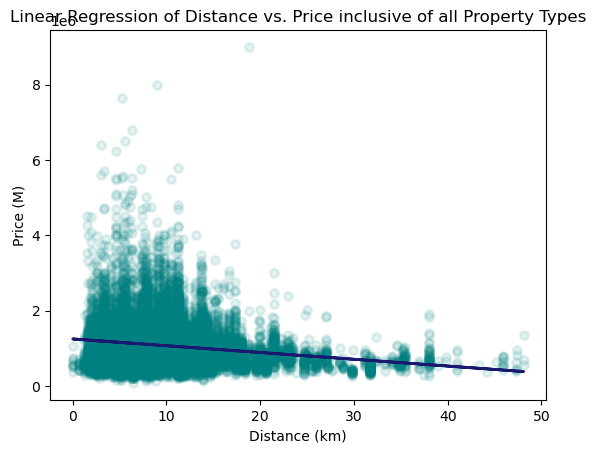

In [218]:
base_data_df=Q2_distance_df.copy()
base_data_df.reset_index(drop=True, inplace=True)

X=base_data_df.iloc[:,2].values.reshape(-1, 1)
Y=base_data_df.iloc[:,4].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

plt.scatter(X, Y, color="teal", lw=2, alpha=0.1)
plt.plot(X,Y_pred, markevery=25, color="midnightblue", lw=2,)
plt.title("Linear Regression of Distance vs. Price inclusive of all Property Types")
plt.ylabel("Price (M)")
plt.xlabel("Distance (km)")
plt.show()


In [174]:
# Data Average Price by Distance_Aggregated at Propert Type and Region Name
base_data_df=Q2_distance_df.copy()
base_data_df=base_data_df.drop(['Longtitude', 'Lattitude'], axis=1)
base_data_df=base_data_df.rename(columns={'Type': "Property Type"})
base_data_df2= base_data_df.groupby(['Distance', 'Regionname', 'Property Type']).agg(AVG_Price=('Price', np.mean))
base_data_df2.head()


AVG_Price
Distance Regionname            Property Type              
0.0      Northern Metropolitan u              6.322000e+05
0.7      Southern Metropolitan u              5.487500e+05
1.2      Southern Metropolitan h              9.116667e+05
                               u              6.208500e+05
1.3      Northern Metropolitan h              1.875000e+06

In [175]:
#Create Distance Data Sets by Type
Type_Unit= (Q2_distance_df['Type']=='u')
Type_House = (Q2_distance_df['Type']=='h')
Type_Townhouse = (Q2_distance_df['Type']=='t')

Unit_distance_df= Q2_distance_df.loc[Type_Unit]
Unit_distance_df = Unit_distance_df.dropna(how='any')
Unit_distance_df.reset_index(drop=True, inplace=True)
print("Unit_Distance_data")
print(Unit_distance_df)

TownH_distance_df= Q2_distance_df.loc[Type_Townhouse]
TownH_distance_df = TownH_distance_df.dropna(how='any')
TownH_distance_df.reset_index(drop=True, inplace=True)
print("TownH_Distance_data")
print(TownH_distance_df)

House_distance_df= Q2_distance_df.loc[Type_House]
House_distance_df = House_distance_df.dropna(how='any')
House_distance_df.reset_index(drop=True, inplace=True)
print("House_Distance_data")
print(House_distance_df)

Unit_Distance_data
      Lattitude  Longtitude  Distance Type    Price             Regionname
0     -37.80080   144.99730       2.5    u   300000  Northern Metropolitan
1     -37.81100   145.00670       2.5    u   700000  Northern Metropolitan
2     -37.80780   144.99650       2.5    u   750000  Northern Metropolitan
3     -37.80160   144.99880       2.5    u   441000  Northern Metropolitan
4     -37.80780   144.99650       2.5    u  1090000  Northern Metropolitan
...         ...         ...       ...  ...      ...                    ...
3469  -37.75469   145.00199       7.0    u   428000  Northern Metropolitan
3470  -37.84740   145.01247       4.1    u   631000  Southern Metropolitan
3471  -37.70501   144.88182      12.9    u   530000   Western Metropolitan
3472  -37.70811   144.88089      12.9    u   290000   Western Metropolitan
3473  -37.71500   145.07649      14.5    u   590000  Northern Metropolitan

[3474 rows x 6 columns]
TownH_Distance_data
      Lattitude  Longtitude  Distanc

In [176]:
#Create Avg Price Distance Data Sets by Type
Type_Unit= (Q2_distance_df['Type']=='u')
Type_House = (Q2_distance_df['Type']=='h')
Type_Townhouse = (Q2_distance_df['Type']=='t')

Unit_distance_df= Q2_distance_df.loc[Type_Unit]
Unit_distance_df = Unit_distance_df.dropna(how='any')

Unit_distance_df.reset_index(drop=True, inplace=True)
print("Unit_Distance_data")
print(Unit_distance_df)

TownH_distance_df= Q2_distance_df.loc[Type_Townhouse]
TownH_distance_df = TownH_distance_df.dropna(how='any')
TownH_distance_df.reset_index(drop=True, inplace=True)
print("TownH_Distance_data")
print(TownH_distance_df)

House_distance_df= Q2_distance_df.loc[Type_House]
House_distance_df = House_distance_df.dropna(how='any')
House_distance_df.reset_index(drop=True, inplace=True)
print("House_Distance_data")
print(House_distance_df)

Unit_Distance_data
      Lattitude  Longtitude  Distance Type    Price             Regionname
0     -37.80080   144.99730       2.5    u   300000  Northern Metropolitan
1     -37.81100   145.00670       2.5    u   700000  Northern Metropolitan
2     -37.80780   144.99650       2.5    u   750000  Northern Metropolitan
3     -37.80160   144.99880       2.5    u   441000  Northern Metropolitan
4     -37.80780   144.99650       2.5    u  1090000  Northern Metropolitan
...         ...         ...       ...  ...      ...                    ...
3469  -37.75469   145.00199       7.0    u   428000  Northern Metropolitan
3470  -37.84740   145.01247       4.1    u   631000  Southern Metropolitan
3471  -37.70501   144.88182      12.9    u   530000   Western Metropolitan
3472  -37.70811   144.88089      12.9    u   290000   Western Metropolitan
3473  -37.71500   145.07649      14.5    u   590000  Northern Metropolitan

[3474 rows x 6 columns]
TownH_Distance_data
      Lattitude  Longtitude  Distanc

In [177]:
# Nope##
HDist_df = House_distance_df.drop(['Lattitude', 'Longtitude', 'Type', 'Regionname'], axis=1)
HDist_df[avg_price] = np.mean('Price')

HDist_df=pd.DataFrame(HDist_df)

HDist_df

TypeError: cannot perform reduce with flexible type

In [178]:
#Nope##
HDist_df.columns()

TypeError: 'Index' object is not callable

In [179]:
x_values = House_distance_df["Distance"]
y_values = [House_distance_df["Price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('House Pricing by distance to the CBD')
plt.show()

SyntaxError: invalid syntax (1507125274.py, line 3)

In [180]:
#Property Type = House, Distance
x = np.array([House_distance_df["Distance"]])
y = np.array([House_distance_df["Price"]])
plt.scatter(x, y, color="C8")
folium.Map(location=[-38.5, 143.8]), tiles="Mapbox", API-key= "config.py", zoom_start=18)
Folium.Circle(
    radius=60,
    location=[-38.5, 143.8],
    popup="Regionname",
    color="crimson",
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[-38.5, 143.8],
    radius=50,
    popup="Regionname",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)
m.add_child(folium.LatLngPopup())
m
plt.show()

SyntaxError: cannot assign to function call (2517441642.py, line 5)

In [181]:
###
X=base_data_df.iloc[:,2].values.reshape(-1, 1)
Y=base_data_df.iloc[:,4].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

plt.scatter(X, Y, color="teal", lw=2, alpha=0.1)
plt.plot(X,Y_pred, markevery=25, color="midnightblue", lw=2,)
plt.title("Linear Regression of Distance vs. Price inclusive of all Property Types")
plt.ylabel("Price")
plt.xlabel("Distance")
plt.show()
###

IndexError: single positional indexer is out-of-bounds

In [182]:
TownH_distance_df.head()

,Lattitude,Longtitude,Distance,Type,Price,Regionname
0,-37.8093,144.9959,2.5,t,900000,Northern Metropolitan
1,-37.7972,144.9969,2.5,t,962000,Northern Metropolitan
2,-37.7180,144.8780,13.5,t,840000,Western Metropolitan
3,-37.7218,144.8837,13.5,t,700000,Western Metropolitan
4,-37.7216,144.8710,13.5,t,450000,Western Metropolitan


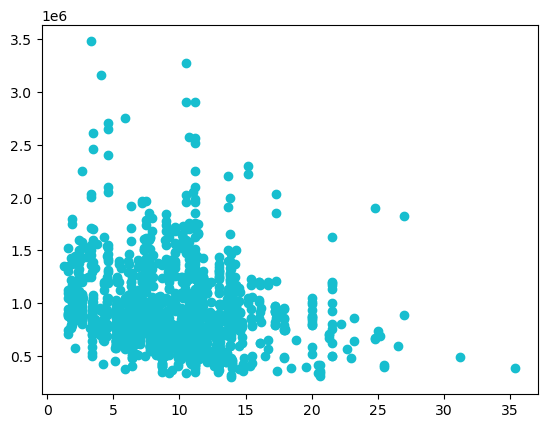

In [217]:
#Working but missing linear Regres
#Property Type = Townhouse, Distance
x = np.array([TownH_distance_df["Distance"]])
y = np.array([TownH_distance_df["Price"]])
plt.scatter(x, y, color="C9")

plt.show()

coefficient of determination :0.027020505620298785
intercept: [1080374.29204689]
slope: [[-14367.27306981]]


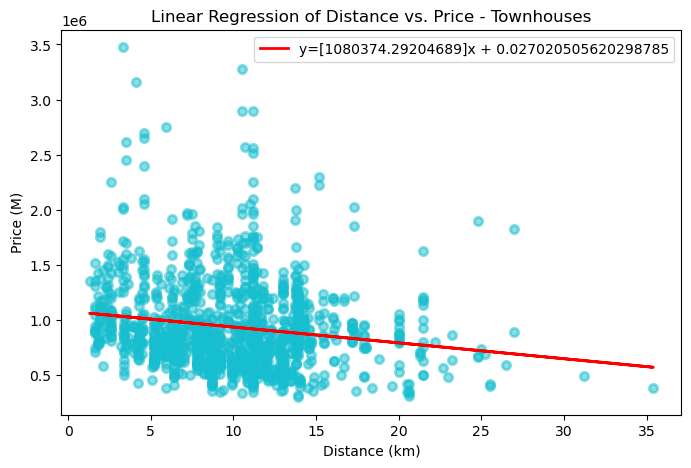

In [216]:
#This works for Townhouses
fig_towh=plt.figure(figsize=(8, 5))
X=np.array(TownH_distance_df.iloc[:,2].values).reshape((-1, 1))
Y=np.array(TownH_distance_df.iloc[:,4].values).reshape((-1, 1))
model = LinearRegression()
model.fit(X, Y)
model=LinearRegression().fit(X,Y)
r_sq = model.score(X,Y)
print(f"coefficient of determination :{r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
new_model = LinearRegression().fit(X, Y.reshape((-1, 1)))
#print(f"new model intercept: {new_model.intercept_}")
#print(f"new model slope: {new_model.coef_}")
Y_pred = model.predict(X)
(f"predicted response:\n{Y_pred}")

plt.scatter(X, Y, color="C9", lw=2, alpha=0.5)
plt.plot(X,Y_pred, color="red", lw=2, label=(f"y={model.intercept_}x + {r_sq}"))
plt.title("Linear Regression of Distance vs. Price - Townhouses")
plt.ylabel("Price (M)")
plt.xlabel("Distance (km)")
plt.legend()
plt.show()


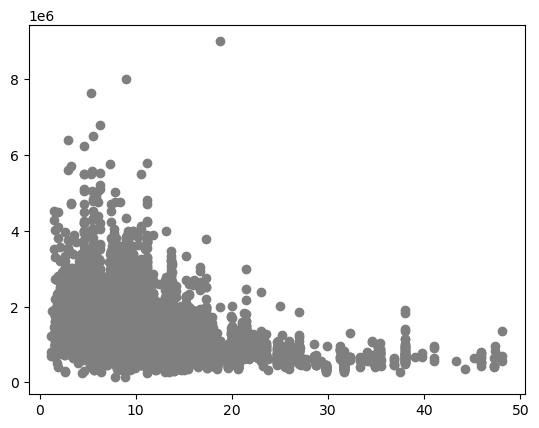

In [215]:
#Working but missing linear Regres
#Property Type = House, Distance
x = np.array([House_distance_df["Distance"]])
y = np.array([House_distance_df["Price"]])
plt.scatter(x, y, color="C7")
plt.show()

coefficient of determination :0.11623359666003508
intercept: [1639775.02486201]
slope: [[-35918.1539601]]


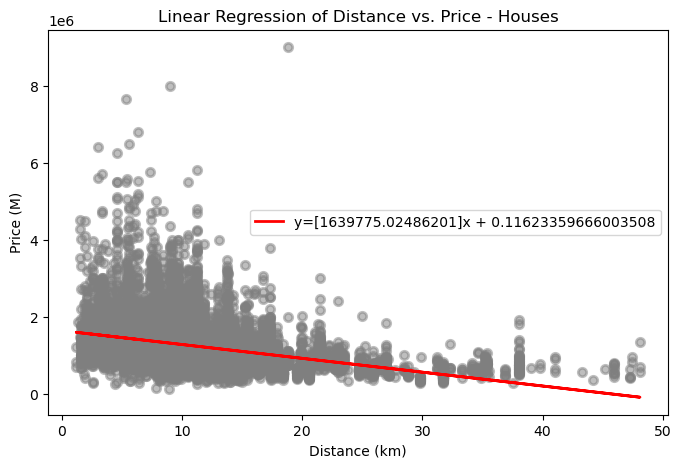

In [213]:
#This works for Houses
fig_house=plt.figure(figsize=(8, 5))
X=np.array(House_distance_df.iloc[:,2].values).reshape((-1, 1))
Y=np.array(House_distance_df.iloc[:,4].values).reshape((-1, 1))
model = LinearRegression()
model.fit(X, Y)
model=LinearRegression().fit(X,Y)
r_sq = model.score(X,Y)
print(f"coefficient of determination :{r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
new_model = LinearRegression().fit(X, Y.reshape((-1, 1)))
#print(f"new model intercept: {new_model.intercept_}")
#print(f"new model slope: {new_model.coef_}")
Y_pred = model.predict(X)
(f"predicted response:\n{Y_pred}")

plt.scatter(X, Y, color="C7", lw=2, alpha=0.5)
plt.plot(X,Y_pred, color="red", lw=2, label=(f"y={model.intercept_}x + {r_sq}"))
plt.title("Linear Regression of Distance vs. Price - Houses")
plt.ylabel("Price (M)")
plt.xlabel("Distance (km)")
plt.legend()
plt.show()



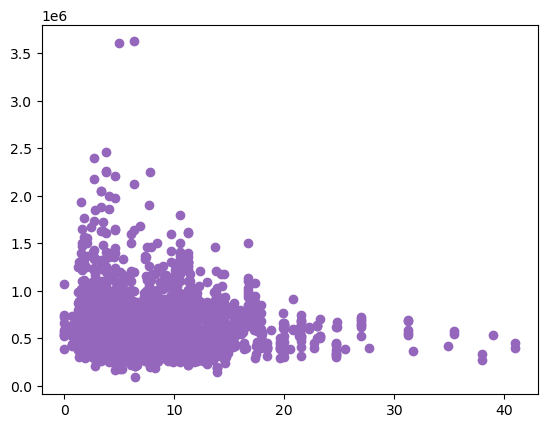

In [209]:
#Working but missing linear Regres
#Property Type = Unit or Appartment, Distance
x = np.array([Unit_distance_df["Distance"]])
y = np.array([Unit_distance_df["Price"]])
plt.scatter(x, y, color="C4")
plt.show()

coefficient of determination :0.0026799521362949053
intercept: [630254.38036923]
slope: [[-2893.93785624]]


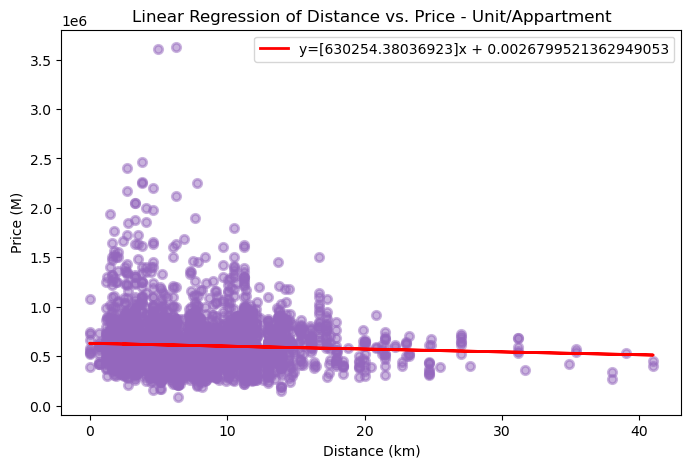

In [214]:
#This works for Units and Appartments
fig_unit=plt.figure(figsize=(8, 5))
X=np.array(Unit_distance_df.iloc[:,2].values).reshape((-1, 1))
Y=np.array(Unit_distance_df.iloc[:,4].values).reshape((-1, 1))
model = LinearRegression()
model.fit(X, Y)
model=LinearRegression().fit(X,Y)
r_sq = model.score(X,Y)
print(f"coefficient of determination :{r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
new_model = LinearRegression().fit(X, Y.reshape((-1, 1)))
Y_pred = model.predict(X)
(f"predicted response:\n{Y_pred}")

plt.scatter(X, Y, color="C4", lw=2, alpha=0.5)
plt.plot(X,Y_pred, color="red", lw=2, label=(f"y={model.intercept_}x + {r_sq}"))
plt.title("Linear Regression of Distance vs. Price - Unit/Appartment")
plt.ylabel("Price (M)")
plt.xlabel("Distance (km)")
plt.legend()
plt.show()


C:\Users\kk\AppData\Local\Temp\ipykernel_16968\1439767448.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=44.0)


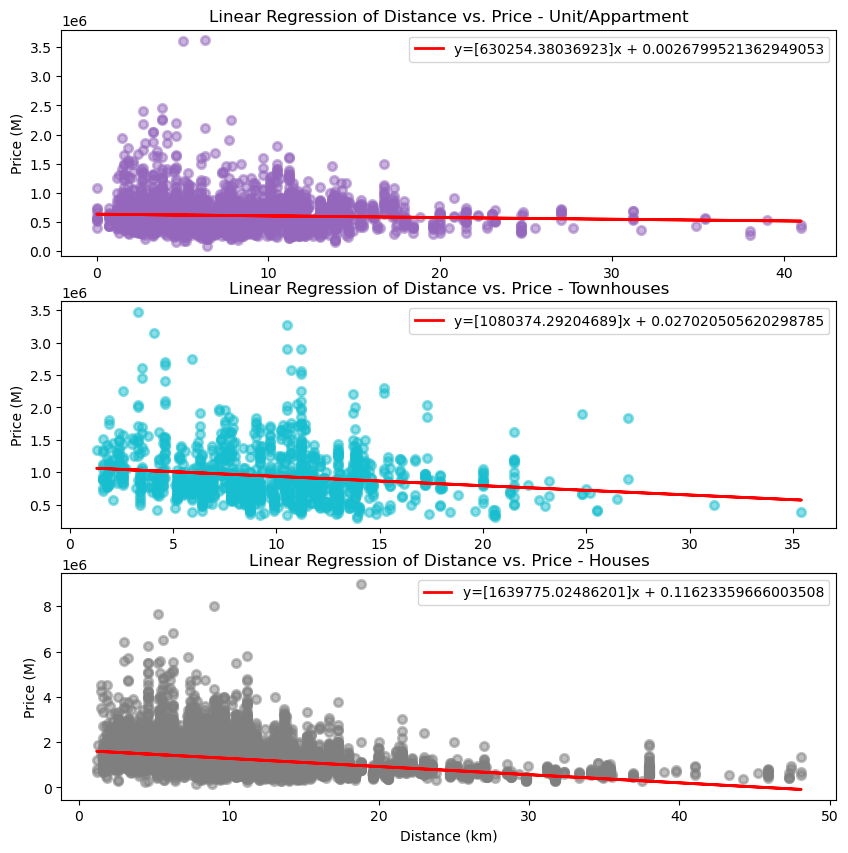

In [210]:
#Combined Distance vs. Price Fig
fig_distance=plt.figure(figsize=(10, 10))
fig.tight_layout(pad=44.0)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

ax1=plt.subplot(311)
ax1=X=np.array(Unit_distance_df.iloc[:,2].values).reshape((-1, 1))
ax1=Y=np.array(Unit_distance_df.iloc[:,4].values).reshape((-1, 1))
ax1=model = LinearRegression()
ax1=model.fit(X, Y)
ax1=model=LinearRegression().fit(X,Y)
ax1=r_sq = model.score(X,Y)
ax1=new_model = LinearRegression().fit(X, Y.reshape((-1, 1)))
ax1=Y_pred = model.predict(X)
ax1=plt.scatter(X, Y, color="C4", lw=2, alpha=0.5)
ax1=plt.plot(X,Y_pred, color="red", lw=2, label=(f"y={model.intercept_}x + {r_sq}"))
ax1=plt.title("Linear Regression of Distance vs. Price - Unit/Appartment")
ax1=plt.ylabel("Price (M)")
ax1=plt.legend()

ax2=plt.subplot(312)
ax2=X=np.array(TownH_distance_df.iloc[:,2].values).reshape((-1, 1))
ax2=Y=np.array(TownH_distance_df.iloc[:,4].values).reshape((-1, 1))
ax2=model = LinearRegression()
ax2=model.fit(X, Y)
ax2=model=LinearRegression().fit(X,Y)
ax2=r_sq = model.score(X,Y)
ax2=new_model = LinearRegression().fit(X, Y.reshape((-1, 1)))
ax2=Y_pred = model.predict(X)
ax2=plt.scatter(X, Y, color="C9", lw=2, alpha=0.5)
ax2=plt.plot(X,Y_pred, color="red", lw=2, label=(f"y={model.intercept_}x + {r_sq}"))
ax2=plt.title("Linear Regression of Distance vs. Price - Townhouses")
ax2=plt.ylabel("Price (M)")
ax2=plt.legend()

ax3=plt.subplot(313)
ax3=X=np.array(House_distance_df.iloc[:,2].values).reshape((-1, 1))
ax3=Y=np.array(House_distance_df.iloc[:,4].values).reshape((-1, 1))
ax3=model = LinearRegression()
ax3=model.fit(X, Y)
ax3=model=LinearRegression().fit(X,Y)
ax3=r_sq = model.score(X,Y)
ax3=new_model = LinearRegression().fit(X, Y.reshape((-1, 1)))
ax3=Y_pred = model.predict(X)
ax3=plt.scatter(X, Y, color="C7", lw=2, alpha=0.5)
ax3=plt.plot(X,Y_pred, color="red", lw=2, label=(f"y={model.intercept_}x + {r_sq}"))
ax3=plt.title("Linear Regression of Distance vs. Price - Houses")
ax3=plt.ylabel("Price (M)")
ax3=plt.xlabel("Distance (km)")
ax3=plt.legend()

plt.show()



In [192]:
#Create a data set for each demographic profile
couples_filter = (Q2_bedrooms_df['Bedroom2'] == 2)
Q2_couples_df = Q2_bedrooms_df.loc[couples_filter]
Q2_couples_df.reset_index(drop=True, inplace=True)
print("Couples Dataset")
print(Q2_couples_df)

singles_filter = (Q2_bedrooms_df['Bedroom2'] <= 2) & (Q2_bedrooms_df['Type'] != 'h')
Q2_singles_df = Q2_bedrooms_df.loc[singles_filter]
Q2_singles_df.reset_index(drop=True, inplace=True)
print("Singles Dataset")
print(Q2_singles_df)

smallfam_filter = (Q2_bedrooms_df['Bedroom2'] >= 2) & (Q2_bedrooms_df['Bedroom2'] <= 3)
Q2_smallfam_df = Q2_bedrooms_df.loc[smallfam_filter]
Q2_smallfam_df.reset_index(drop=True, inplace=True)
print("Small Families Dataset")
print(Q2_smallfam_df)

lrgefam_filter = (Q2_bedrooms_df['Bedroom2'] >=3) & (Q2_bedrooms_df['Type'] == 'h')
Q2_lrgefam_df = Q2_bedrooms_df.loc[lrgefam_filter]
Q2_lrgefam_df.reset_index(drop=True, inplace=True)
print("Large Families Dataset")
print(Q2_lrgefam_df)


Couples Dataset
      Lattitude  Longtitude  Bedroom2 Type    Price             Regionname
0     -37.79960   144.99840       2.0    h  1480000  Northern Metropolitan
1     -37.80790   144.99340       2.0    h  1035000  Northern Metropolitan
2     -37.80410   144.99530       2.0    h   941000  Northern Metropolitan
3     -37.80600   144.99540       2.0    h  1636000  Northern Metropolitan
4     -37.81100   145.00670       2.0    u   700000  Northern Metropolitan
...         ...         ...       ...  ...      ...                    ...
4117  -37.70811   144.88089       2.0    u   290000   Western Metropolitan
4118  -37.71500   145.07649       2.0    u   590000  Northern Metropolitan
4119  -37.70657   145.07878       2.0    h   650000  Northern Metropolitan
4120  -37.80968   144.86819       2.0    t   655000   Western Metropolitan
4121  -37.86393   144.90484       2.0    t   622500   Western Metropolitan

[4122 rows x 6 columns]
Singles Dataset
      Lattitude  Longtitude  Bedroom2 Type 

In [193]:
#Export data sources for spot checks
Q2_lrgefam_df.to_csv('Q2_lrgefam_df.csv', index=False)
Q2_smallfam_df.to_csv('Q2_smallfam_df.csv', index=False)
Q2_couples_df.to_csv('Q2_couples_df.csv', index=False)
Q2_singles_df.to_csv('Q2_singles_df.csv', index=False)

In [194]:
print(Q2_lrgefam_df['Type'])

0       h
1       h
2       h
3       h
4       h
       ..
8564    h
8565    h
8566    h
8567    h
8568    h
Name: Type, Length: 8569, dtype: object


Demographic Property Type Distribution across Melbourne

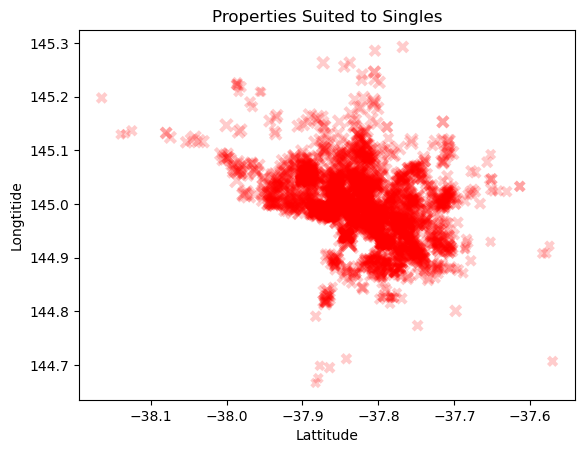

In [195]:
#Map me up please#
#Singles Purchasing Locations Sized by Price
plot_100_df = pd.read_csv('Q2_singles_df.csv')
plt.title('Properties Suited to Singles')
plt.xlabel('Lattitude')
plt.ylabel('Longtitide')
SG_fig = plt.scatter(Q2_singles_df['Lattitude'], Q2_singles_df['Longtitude'], s=(Q2_singles_df['Price'])*0.0001,
     linewidth=3, marker="x", color='r', alpha=0.2)

plt.show() 

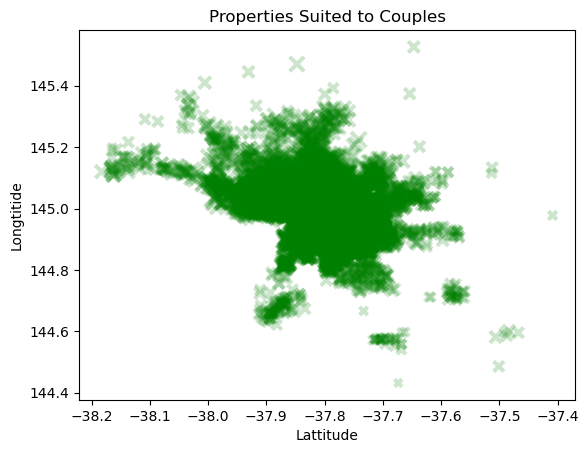

In [196]:
#Map me up please#
#Couples Purchasing Locations Sized by Price
plot_101_df = pd.read_csv('Q2_couples_df.csv')
plt.title('Properties Suited to Couples')
plt.xlabel('Lattitude')
plt.ylabel('Longtitide')
CP_fig = plt.scatter(Q2_smallfam_df['Lattitude'], Q2_smallfam_df['Longtitude'], s=(Q2_smallfam_df['Price'])*.0001, 
                     color='g', linewidth=3, marker="x", alpha=0.2)
plt.show() 

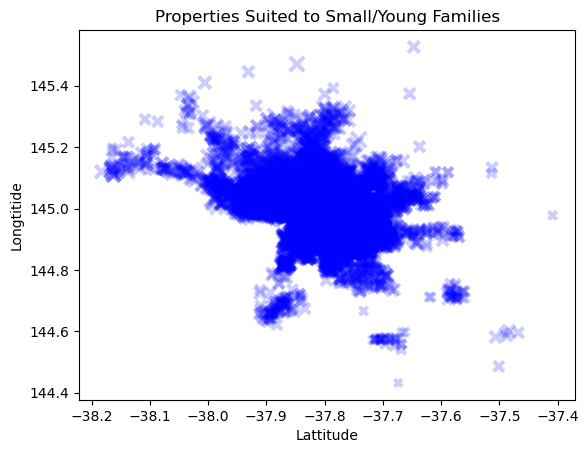

In [197]:
#Map me up please#
#Small Family Purchasing Locations Sized by Price
plot_102_df = pd.read_csv('Q2_smallfam_df.csv')
plt.title('Properties Suited to Small/Young Families')
plt.xlabel('Lattitude')
plt.ylabel('Longtitide')
SF_Fig = plt.scatter(Q2_smallfam_df['Lattitude'], Q2_smallfam_df['Longtitude'], s=(Q2_smallfam_df['Price'])*.0001, 
                     color='b', linewidth=3, marker="x", alpha=0.2)

plt.show() 

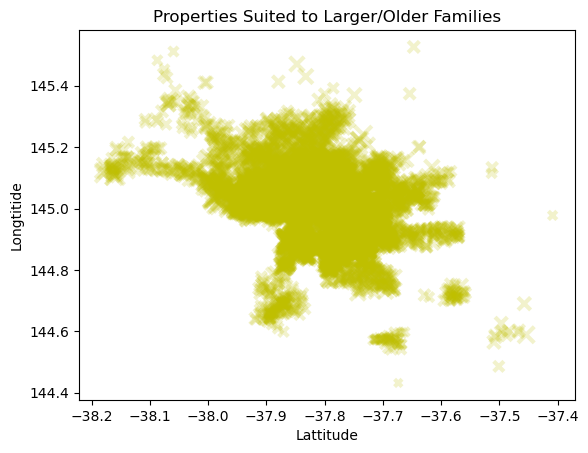

In [198]:
#Large Family Purchasing Locations Sized by Price
plot_104_df = pd.read_csv('Q2_lrgefam_df.csv')
plt.xlabel('Lattitude')
plt.ylabel('Longtitide')
plt.title('Properties Suited to Larger/Older Families')
LF_fig = plt.scatter(Q2_lrgefam_df['Lattitude'], 
                    Q2_lrgefam_df['Longtitude'],  
                    s=(Q2_lrgefam_df['Price'])*.0001, 
                    color='y', 
                    linewidth=3, 
                    marker="x", 
                    alpha=0.2)

plt.show() 

In [199]:
Q2_lrgefam_df=Q2_lrgefam_df.round(3)
Q2_lrgefam_df=Q2_lrgefam_df.groupby(['Longtitude' ,'Lattitude', 'Bedroom2', 'Price']).mean()
print(Q2_lrgefam_df.count())

Series([], dtype: int64)


C:\Users\kk\AppData\Local\Temp\ipykernel_16968\2320332426.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  Q2_lrgefam_df=Q2_lrgefam_df.groupby(['Longtitude' ,'Lattitude', 'Bedroom2', 'Price']).mean()


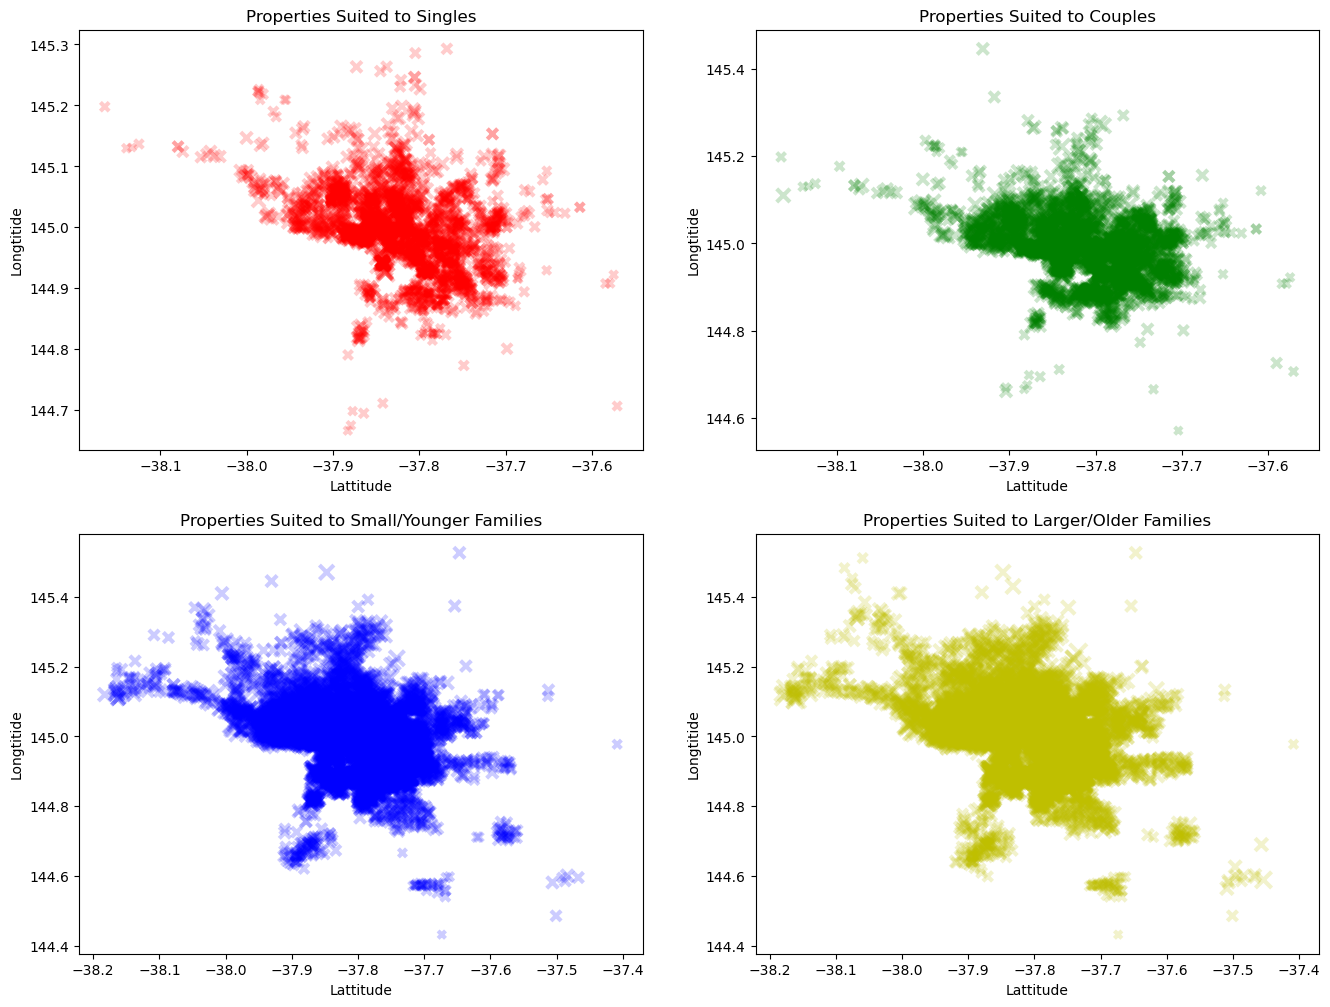

In [201]:
# Subplots (happy, just add map)
fig=plt.figure(figsize=(16, 12))
fig.tight_layout(pad=18.0)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax2 = plt.subplot(224)

ax1=plt.subplot(221)
ax1=plt.xlabel('Lattitude')
ax1=plt.ylabel('Longtitide')
ax1=plt.title('Properties Suited to Singles')
ax1=plt.scatter(Q2_singles_df['Lattitude'], Q2_singles_df['Longtitude'], 
            s=(Q2_singles_df['Price'])*0.0001, 
            color='r', linewidth=3, marker="x", alpha=0.2)

ax2=plt.subplot(222)
ax2=plt.xlabel('Lattitude')
ax2=plt.ylabel('Longtitide')
ax2=plt.title('Properties Suited to Couples')
ax2=plt.scatter(Q2_couples_df['Lattitude'], Q2_couples_df['Longtitude'], 
            s=(Q2_couples_df['Price'])*.0001, 
            color='g', linewidth=3, marker="x", alpha=0.2)

ax3=plt.subplot(223)
ax3=plt.xlabel('Lattitude')
ax3=plt.ylabel('Longtitide')
ax3=plt.title('Properties Suited to Small/Younger Families')
ax3=plt.scatter(Q2_smallfam_df['Lattitude'], Q2_smallfam_df['Longtitude'], 
            s=(Q2_smallfam_df['Price'])*.0001, 
            color='b', linewidth=3, marker="x", alpha=0.2)

ax4=plt.subplot(224)
ax4=plt.xlabel('Lattitude')
ax4=plt.ylabel('Longtitide')
ax4=plt.title('Properties Suited to Larger/Older Families')
ax4=plt.scatter(Q2_lrgefam_df['Lattitude'], Q2_lrgefam_df['Longtitude'], 
            s=(Q2_lrgefam_df['Price'])*.0001, 
            color='y', linewidth=3, marker="x", alpha=0.2)

plt.show()

In [203]:
print(Q2_singles_df)
print(Q2_couples_df)
print(Q2_smallfam_df)
print(Q2_lrgefam_df)

      Lattitude  Longtitude  Bedroom2 Type   Price             Regionname
0     -37.80080   144.99730       1.0    u  300000  Northern Metropolitan
1     -37.81100   145.00670       2.0    u  700000  Northern Metropolitan
2     -37.80780   144.99650       2.0    u  750000  Northern Metropolitan
3     -37.80160   144.99880       1.0    u  441000  Northern Metropolitan
4     -37.80150   144.99720       2.0    u  500000  Northern Metropolitan
...         ...         ...       ...  ...     ...                    ...
3225  -37.70501   144.88182       2.0    u  530000   Western Metropolitan
3226  -37.70811   144.88089       2.0    u  290000   Western Metropolitan
3227  -37.71500   145.07649       2.0    u  590000  Northern Metropolitan
3228  -37.80968   144.86819       2.0    t  655000   Western Metropolitan
3229  -37.86393   144.90484       2.0    t  622500   Western Metropolitan

[3230 rows x 6 columns]
      Lattitude  Longtitude  Bedroom2 Type    Price             Regionname
0     -37.79